In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import the dataset

df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

In [3]:
# review the dataset output

df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
# there are 50 columns in the dataset:

df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [5]:
# dropping columns 'encounter_id', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'payer_code' and
#'medical_specialty' because they only provide id codes and don't provide any information significant for statistical analysis.

drop_cols=['encounter_id','admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'payer_code', 'medical_specialty']
df.drop(drop_cols, inplace=True, axis=1)

In [6]:
df

,patient_nbr,race,gender,age,weight,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),?,1,41,0,1,0,...,No,No,No,No,No,No,No,No,No,NO
1,55629189,Caucasian,Female,[10-20),?,3,59,0,18,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),?,2,11,5,13,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),?,2,44,1,16,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),?,1,51,0,8,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,100162476,AfricanAmerican,Male,[70-80),?,3,51,0,16,0,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,74694222,AfricanAmerican,Female,[80-90),?,5,33,3,18,0,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,41088789,Caucasian,Male,[70-80),?,1,53,0,9,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,31693671,Caucasian,Female,[80-90),?,10,45,2,21,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [7]:
# checking data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 44 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   patient_nbr               101766 non-null  int64 
 1   race                      101766 non-null  object
 2   gender                    101766 non-null  object
 3   age                       101766 non-null  object
 4   weight                    101766 non-null  object
 5   time_in_hospital          101766 non-null  int64 
 6   num_lab_procedures        101766 non-null  int64 
 7   num_procedures            101766 non-null  int64 
 8   num_medications           101766 non-null  int64 
 9   number_outpatient         101766 non-null  int64 
 10  number_emergency          101766 non-null  int64 
 11  number_inpatient          101766 non-null  int64 
 12  diag_1                    101766 non-null  object
 13  diag_2                    101766 non-null  object
 14  diag

In [8]:
# check diabetic distribution by weight. Analyzing below, weight column has '?' for 98569 out of 101766 (96.86%) values and 
# is not a significant source for statistical analysis. 

df.groupby(['weight'])['diabetesMed'].count()

weight
>200             3
?            98569
[0-25)          48
[100-125)      625
[125-150)      145
[150-175)       35
[175-200)       11
[25-50)         97
[50-75)        897
[75-100)      1336
Name: diabetesMed, dtype: int64

In [9]:
# my analysis will concetrate on how prevalent diabetes is among African American patients based on gender and age, and how it
# compares to Caucasian patients based on same factors.

# creating sub dataframe that only shows African American patients.

options = ['AfricanAmerican']
dfAA = df.loc[df['race'].isin(options)]
dfAA

,patient_nbr,race,gender,age,weight,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
2,86047875,AfricanAmerican,Female,[20-30),?,2,11,5,13,2,...,No,No,No,No,No,No,No,No,Yes,NO
10,89869032,AfricanAmerican,Female,[40-50),?,9,47,2,17,0,...,No,Steady,No,No,No,No,No,No,Yes,>30
11,77391171,AfricanAmerican,Male,[60-70),?,7,62,0,11,0,...,No,Steady,No,No,No,No,No,Ch,Yes,<30
14,49726791,AfricanAmerican,Female,[60-70),?,1,49,5,2,0,...,No,Steady,No,No,No,No,No,No,Yes,>30
15,86328819,AfricanAmerican,Male,[60-70),?,12,75,5,13,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101739,30656952,AfricanAmerican,Male,[70-80),?,1,32,6,14,2,...,No,Steady,No,No,No,No,No,No,Yes,NO
101741,58160520,AfricanAmerican,Male,[90-100),?,4,21,1,8,0,...,No,No,No,No,No,No,No,No,No,NO
101760,50375628,AfricanAmerican,Female,[60-70),?,6,45,1,25,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101761,100162476,AfricanAmerican,Male,[70-80),?,3,51,0,16,0,...,No,Down,No,No,No,No,No,Ch,Yes,>30


In [10]:
# column "diabetesMed" indicates if patient is on diabetic medication, indicating that patient has diabetis diagnosis

# creating sub dataframe that only shows African American patients who are on diabetic medciation

options = ['Yes']
dfAAdiabetics = dfAA.loc[df['diabetesMed'].isin(options)]
dfAAdiabetics

,patient_nbr,race,gender,age,weight,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
2,86047875,AfricanAmerican,Female,[20-30),?,2,11,5,13,2,...,No,No,No,No,No,No,No,No,Yes,NO
10,89869032,AfricanAmerican,Female,[40-50),?,9,47,2,17,0,...,No,Steady,No,No,No,No,No,No,Yes,>30
11,77391171,AfricanAmerican,Male,[60-70),?,7,62,0,11,0,...,No,Steady,No,No,No,No,No,Ch,Yes,<30
14,49726791,AfricanAmerican,Female,[60-70),?,1,49,5,2,0,...,No,Steady,No,No,No,No,No,No,Yes,>30
15,86328819,AfricanAmerican,Male,[60-70),?,12,75,5,13,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101724,105807996,AfricanAmerican,Male,[60-70),?,7,91,4,23,0,...,No,No,No,No,No,No,No,No,Yes,NO
101739,30656952,AfricanAmerican,Male,[70-80),?,1,32,6,14,2,...,No,Steady,No,No,No,No,No,No,Yes,NO
101760,50375628,AfricanAmerican,Female,[60-70),?,6,45,1,25,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101761,100162476,AfricanAmerican,Male,[70-80),?,3,51,0,16,0,...,No,Down,No,No,No,No,No,Ch,Yes,>30


In [11]:
# creating sub dataframe that only shows Caucasian patients.

options = ['Caucasian']
dfC = df.loc[df['race'].isin(options)]
dfC

,patient_nbr,race,gender,age,weight,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),?,1,41,0,1,0,...,No,No,No,No,No,No,No,No,No,NO
1,55629189,Caucasian,Female,[10-20),?,3,59,0,18,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
3,82442376,Caucasian,Male,[30-40),?,2,44,1,16,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),?,1,51,0,8,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,82637451,Caucasian,Male,[50-60),?,3,31,6,16,0,...,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,120975314,Caucasian,Female,[80-90),?,5,76,1,22,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101759,86472243,Caucasian,Male,[80-90),?,1,1,0,15,3,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101763,41088789,Caucasian,Male,[70-80),?,1,53,0,9,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,31693671,Caucasian,Female,[80-90),?,10,45,2,21,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [12]:
# creating sub dataframe that only shows Caucasian patients who are on diabetic medciation

options = ['Yes']
dfCdiabetics = dfC.loc[df['diabetesMed'].isin(options)]
dfCdiabetics

,patient_nbr,race,gender,age,weight,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,55629189,Caucasian,Female,[10-20),?,3,59,0,18,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
3,82442376,Caucasian,Male,[30-40),?,2,44,1,16,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),?,1,51,0,8,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,82637451,Caucasian,Male,[50-60),?,3,31,6,16,0,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,84259809,Caucasian,Male,[60-70),?,4,70,1,21,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101757,181593374,Caucasian,Female,[70-80),?,5,21,1,16,0,...,No,Steady,No,No,No,No,No,No,Yes,NO
101758,120975314,Caucasian,Female,[80-90),?,5,76,1,22,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101759,86472243,Caucasian,Male,[80-90),?,1,1,0,15,3,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101763,41088789,Caucasian,Male,[70-80),?,1,53,0,9,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO


In [13]:
# checking what is the distribution of diabetic patients based on gender among African American diabetic patients

dfAAdiabetics1 = dfAAdiabetics.groupby(['gender'])['diabetesMed'].describe()
dfAAdiabetics1

,count,unique,top,freq
gender,,,,
Female,9038,1,Yes,9038
Male,5760,1,Yes,5760


In [14]:
# checking what is the distribution of diabetic patients based on gender among Caucasian diabetic patients

dfCdiabetics.groupby(['gender'])['diabetesMed'].describe()

,count,unique,top,freq
gender,,,,
Female,30170,1,Yes,30170
Male,28280,1,Yes,28280


## Conclusion

Based on African American diabetic patients data sample size of 14798 rows and above count, percent breakdown of African American diabetic patients by gender is 61.08% females and 38.92% males. 

Based on Caucasian diabetic patients data sample size of 58450 rows and above count, percent breakdown of Caucasian diabetic patients by gender is 51.62% females and 48.38% males. 

In [15]:
# creating new dataframe with % breakdown by gender for both African American and Caucasian patients

d = {'Gender': ['Female', 'Male'], 
     '% of African American Diabetic Patients': [61.08, 38.92],
     '% of Caucasian Diabetic Patients': [51.62, 43.38]}
dfPercent_Diabetic_Patients_Gender = pd.DataFrame (data=d)
dfPercent_Diabetic_Patients_Gender

,Gender,% of African American Diabetic Patients,% of Caucasian Diabetic Patients
0,Female,61.08,51.62
1,Male,38.92,43.38


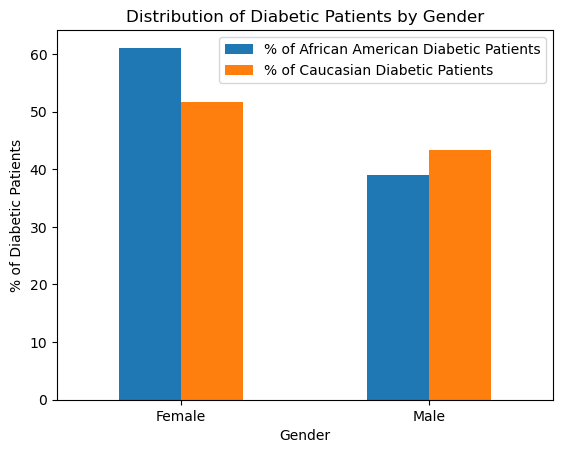

In [16]:
# plotting the breakdown by gender for both African American and Caucasian patients in a graph

dfPercent_Diabetic_Patients_Gender.plot.bar(x='Gender', rot=0);
plt.xlabel ('Gender')
plt.ylabel ('% of Diabetic Patients')
plt.title ("Distribution of Diabetic Patients by Gender")
plt.legend (loc='upper right')


# Conclusion

Based on above analysis and the graph, diabetes is more prevalent among women then men in general. It is also more prevalent amount African American women than Caucasian women. At the same time, it is more prevalent among Caucasian men than African American men.

In [17]:
# checking what is the distribution of diabetic patients based on age among African American diabetic patients

dfAAdiabetics.groupby(['age'])['diabetesMed'].count()

age
[0-10)        14
[10-20)      183
[20-30)      445
[30-40)      974
[40-50)     2156
[50-60)     3347
[60-70)     3225
[70-80)     2896
[80-90)     1334
[90-100)     224
Name: diabetesMed, dtype: int64

In [18]:
# checking what is the distribution of diabetic patients based on age among Caucasian diabetic patients

dfCdiabetics.groupby(['age'])['diabetesMed'].count()

age
[0-10)        113
[10-20)       378
[20-30)       760
[30-40)      1594
[40-50)      4635
[50-60)      9141
[60-70)     13157
[70-80)     16079
[80-90)     10963
[90-100)     1630
Name: diabetesMed, dtype: int64

# Conclusion¶

Based on African American diabetic patients data sample size of 14798 rows and above count, percent breakdown of African American diabetic patients by age is 0.09% age 0-10, 1.24% age 10-20, 3.01% age 20-30, 6.58% age 30-40, 14.57% age 40-50, 22.62% age 50-60, 21.79% age 60-70, 19.57% age 70-80, 9.01% age 80-90, 1.51% age 90-100. 

Based on Caucasian diabetic patients data sample size of 58450 rows and above count, percent breakdown of Caucasian diabetic patients by age is 0.19% age 0-10, 0.65% age 10-20, 1.30% age 20-30, 2.73% age 30-40, 7.93% age 40-50, 15.63% age 50-60, 22.50% age 60-70, 27.50% age 70-80, 18.78% age 80-90, 2.79% age 90-100. 

In [19]:
# creating new dataframe with % breakdown by age for both African American and Caucasian patients

d1 = {'Age': ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'], 
     '% African American Diabetic Patients': [0.09, 1.24, 3.01, 6.58, 14.57, 22.62, 21.79, 19.57, 9.01, 1.51],
     '% Caucasian Diabetic Patients': [0.19, 0.65, 1.30, 2.73, 7.93, 15.63, 22.50, 27.50, 18.78, 2.79]}
dfPercent_Diabetic_Patients = pd.DataFrame (data=d1)
dfPercent_Diabetic_Patients

,Age,% African American Diabetic Patients,% Caucasian Diabetic Patients
0,0-10,0.09,0.19
1,10-20,1.24,0.65
2,20-30,3.01,1.30
3,30-40,6.58,2.73
4,40-50,14.57,7.93
5,50-60,22.62,15.63
6,60-70,21.79,22.50
7,70-80,19.57,27.50
8,80-90,9.01,18.78
9,90-100,1.51,2.79


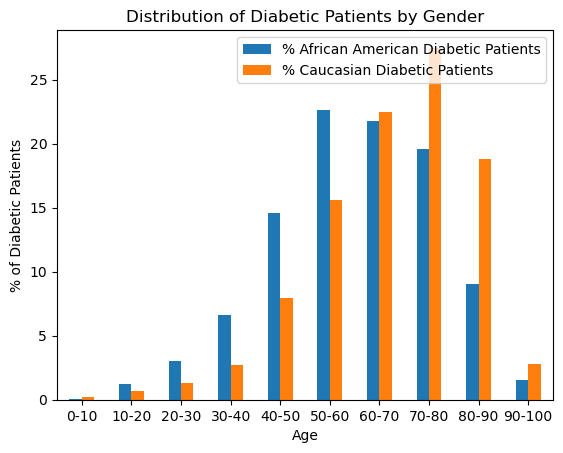

In [20]:
# plotting the breakdown by age for both African American and Caucasian patients in a graph

dfPercent_Diabetic_Patients.plot.bar(x='Age', rot=0);
plt.xlabel ('Age')
plt.ylabel ('% of Diabetic Patients')
plt.title ("Distribution of Diabetic Patients by Gender")
plt.legend (loc='upper right')


# Conclusion

Diabetes is more prevalent in African Americans aged 0 through 60 than Caucasians of the same age. However, from 60 to 100 years old diabetes is more common in Caucasians than African Americans. Diabetes also increases more rapidly for ages 40 through 80 than all other ages in both groups of patients.

# Summary

Based on analysis of patients taking diabetic medication, diabetes is more prevalent among women then men in general. Diabetes is more prevalent among African American women than Caucasian women. At the same time, it is more prevalent among Caucasian men than African American men.

Diabetes is more prevalent in African Americans aged 0 through 60 than Caucasians of the same age. However, from 60 to 100 years old diabetes is more common in Caucasians than African Americans. Diabetes also increases more rapidly for ages 40 through 80 than all other ages in both groups of patients.